In [1439]:
import pandas as pd
import numpy as np
# import seaborn as sns
from math import floor, sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

ic = pd.read_excel("D:\DS\Mine\Corona\I22-02-22.xlsx", index_col=0, parse_dates=[0])
ic['total_vaccinations_f'] = ic['total_vaccinations'].interpolate(method='linear').fillna(0)
ic['stringency_index_f'] = ic['stringency_index'].fillna(method="ffill")
icf = ic.loc[ : , ['total_cases', 'new_cases', 'new_cases_smoothed',
                   'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_vaccinations_f', 'stringency_index_f']]
icf = icf.asfreq(None)
pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('display.max_rows', 2000)
icf

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_vaccinations_f,stringency_index_f
date,,,,,,,,
2020-02-19,2,2,NaN,2,2,NaN,0.00,0.00
2020-02-20,5,3,NaN,2,0,NaN,0.00,2.78
2020-02-21,18,13,NaN,4,2,NaN,0.00,2.78
2020-02-22,28,10,NaN,5,1,NaN,0.00,11.11
2020-02-23,43,15,NaN,8,3,NaN,0.00,11.11
...,...,...,...,...,...,...,...,...
2022-02-17,6894110,17545,"23,357.43",134420,182,160.86,"138,620,249.00",62.04
2022-02-18,6913427,19317,"21,653.14",134607,187,167.14,"138,883,111.00",62.04
2022-02-19,6925485,12058,"20,718.86",134798,191,175.43,"139,147,658.00",62.04


In [1440]:
start_date = '2022-01-15'
icc = icf.loc[start_data: , 'new_cases_smoothed']
icd = icf.loc[start_date: , 'new_deaths_smoothed']

xtc = icc.values
xtd = icd.values

icc, len(xtc), icd

(date
 2022-01-15    1,973.71
 2022-01-16    2,089.71
 2022-01-17    2,265.57
 2022-01-18    2,507.29
 2022-01-19    2,788.86
 2022-01-20    3,112.29
 2022-01-21    3,503.29
 2022-01-22    3,800.71
 2022-01-23    4,208.14
 2022-01-24    4,855.00
 2022-01-25    5,672.86
 2022-01-26    6,785.86
 2022-01-27    8,161.14
 2022-01-28    9,801.29
 2022-01-29   10,976.71
 2022-01-30   13,384.14
 2022-01-31   16,427.57
 2022-02-01   20,097.86
 2022-02-02   23,856.29
 2022-02-03   27,157.71
 2022-02-04   30,036.43
 2022-02-05   31,664.86
 2022-02-06   33,583.86
 2022-02-07   35,130.14
 2022-02-08   35,656.86
 2022-02-09   35,789.00
 2022-02-10   35,258.43
 2022-02-11   34,449.71
 2022-02-12   33,802.29
 2022-02-13   32,428.43
 2022-02-14   30,876.57
 2022-02-15   28,916.14
 2022-02-16   25,662.57
 2022-02-17   23,357.43
 2022-02-18   21,653.14
 2022-02-19   20,718.86
 2022-02-20   19,455.29
 2022-02-21   18,048.71
 Freq: D, Name: new_cases_smoothed, dtype: float64,
 38,
 date
 2022-01-15    28.1

Infected people


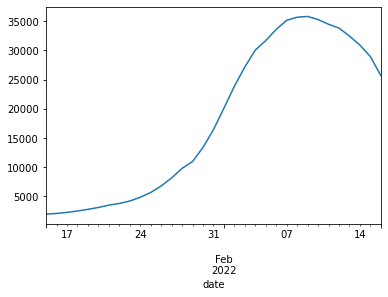

In [1441]:
icn.plot()
print('Infected people')

Deaths


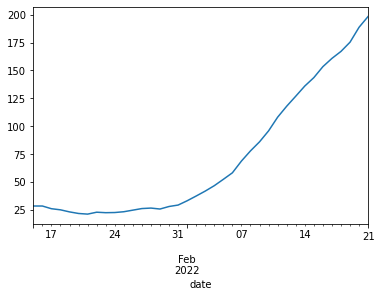

In [1442]:
icd.plot()
print('Deaths')

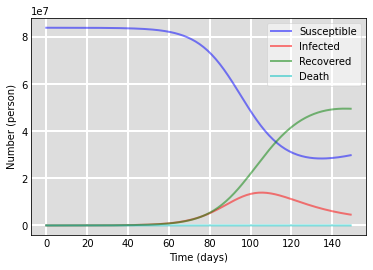

In [1443]:
# First ref:
# https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

    # The SIR model differential equations.
def derivs(y, t, N, beta, gamma, nu, delta):
    S, I, R, D = y
    dSdt = -beta * S * I / N + delta * R
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I - delta * R
    dDdt = nu * dRdt
    dRdt -= dDdt
    return dSdt, dIdt, dRdt, dDdt

    # Main
    # Initial conditions vector
    # Total population, N.
N = 84 * 10 ** 6
    # Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 2300, 1 #6.5 * 10 ** 6
    # Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
D0 = 0 # Only for Omicron
Deaths = 0

# D0 = 130 * 1000
    # Contact rate, beta; and mean recovery/removing rate, gamma, (in 1/days).
beta, gamma = 0.2, 0.1
    # nu: deaths occuring out of removed people, delta: rate of loss of immunity in removed people
nu = 0.0001
delta = 0.01

    # A grid of time points (in days)
t = np.linspace(0, 149, 150)
y0 = S0, I0, R0, D0

    # Integrate the SIR equations over the time grid, t.
ret = odeint(derivs, y0, t, args=(N, beta, gamma, nu, delta))
S, I, R, D = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, D, 'c', alpha=0.5, lw=2, label='Death')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (person)')
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)
plt.show()

In [1444]:
def plot(t, y, name = 'Item', col = 'r'):
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, y, col, alpha=0.5, lw=2, label=name)
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Number (person)')
    # ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label=name)

In [1445]:
import math
def maxI(x):
    return N - N * x[1] / x[0] * (1 + math.log(x[0] / (N * x[1]) * S0))

cons = ()#{'type': 'ineq', 'fun': lambda x: -(maxI(x) - 40000)})#, {'type': 'ineq', 'fun': lambda x: -(maxI(x) - 40000)})

pzero = [0.9, 0.8999999, 0.000001, 0.01, 100]
print(maxI(pzero))

2301.03126090765


In [1511]:
days = list(range(len(xtc)))
print(days)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [1512]:
from sklearn.metrics import mean_squared_error
def error_for_ID(x):
    print(x)
    ebeta, egamma, enu, edelta, inf_ratio = x[0], x[1], x[2], x[3], x[4]
    res = odeint(derivs, y0, days, args=(N, ebeta, egamma, enu, edelta))
    S, I, R, D = res.T
    err = mean_squared_error(I, xtc) / x[4] + mean_squared_error(D[14:], xtd[14:])
    err += len(xtc)/14 *  mean_squared_error(I[-14:], xtc[-14:]) / x[4] + 8 * len(xtd)/7 * mean_squared_error(D[-7:], xtd[-7:])
    
    print(err)
    return err 

In [1513]:
from scipy.optimize import minimize

# param_bounds=([0, 0, 0, 0], [1, 1, 0.000001, 0.01])
param_bounds = ((0, 9), (0, None), (0, None), (0.03, 0.6), (10, 10000))
x = np.array([beta, gamma, nu, delta])

 
res = minimize(error_for_ID, x0=pzero, constraints=cons, bounds=param_bounds)
print(res)

[9.000000e-01 8.999999e-01 1.000000e-06 3.000000e-02 1.000000e+02]
24860633.111043725
[9.0000001e-01 8.9999990e-01 1.0000000e-06 3.0000000e-02 1.0000000e+02]
24860631.978827287
[9.0000000e-01 8.9999991e-01 1.0000000e-06 3.0000000e-02 1.0000000e+02]
24860634.243902363
[9.000000e-01 8.999999e-01 1.010000e-06 3.000000e-02 1.000000e+02]
24860626.54644011
[9.000000e-01 8.999999e-01 1.000000e-06 3.000001e-02 1.000000e+02]
24860633.108728986
[9.000000e-01 8.999999e-01 1.000000e-06 3.000000e-02 1.000000e+02]
24860633.108685333
[9.00000012e-01 8.99999899e-01 1.00000100e+00 3.00000009e-02
 1.00000015e+02]
215758558385.72083
[9.00000022e-01 8.99999899e-01 1.00000100e+00 3.00000009e-02
 1.00000015e+02]
215758631884.7773
[9.00000012e-01 8.99999909e-01 1.00000100e+00 3.00000009e-02
 1.00000015e+02]
215758489648.9332
[9.00000012e-01 8.99999899e-01 1.00000101e+00 3.00000009e-02
 1.00000015e+02]
215758564927.24054
[9.00000012e-01 8.99999899e-01 1.00000100e+00 3.00000109e-02
 1.00000015e+02]
21575855838

[9.37653653e-01 8.62324833e-01 7.16901323e-04 3.02488129e-02
 1.00000058e+02]
6757108.543724519
[9.37653663e-01 8.62324833e-01 7.16901323e-04 3.02488129e-02
 1.00000058e+02]
6757108.542358412
[9.37653653e-01 8.62324843e-01 7.16901323e-04 3.02488129e-02
 1.00000058e+02]
6757108.542511612
[9.37653653e-01 8.62324833e-01 7.16911323e-04 3.02488129e-02
 1.00000058e+02]
6757108.545960674
[9.37653653e-01 8.62324833e-01 7.16901323e-04 3.02488229e-02
 1.00000058e+02]
6757108.5532512525
[9.37653653e-01 8.62324833e-01 7.16901323e-04 3.02488129e-02
 1.00000058e+02]
6757108.543049095
[9.37654661e-01 8.62324882e-01 7.16818434e-04 3.02452181e-02
 1.00000058e+02]
6757104.956258458
[9.37654671e-01 8.62324882e-01 7.16818434e-04 3.02452181e-02
 1.00000058e+02]
6757104.955245961
[9.37654661e-01 8.62324892e-01 7.16818434e-04 3.02452181e-02
 1.00000058e+02]
6757104.954709861
[9.37654661e-01 8.62324882e-01 7.16828434e-04 3.02452181e-02
 1.00000058e+02]
6757104.956381427
[9.37654661e-01 8.62324882e-01 7.168184

3232634.364759488
[6.22281385e+00 6.10300252e+00 5.86693809e-05 3.00014254e-02
 1.02320932e+02]
3232634.819088662
[5.55751075e+00 5.41351587e+00 1.82433741e-04 3.00040064e-02
 1.02023002e+02]
6601551.902338375
[5.55751076e+00 5.41351587e+00 1.82433741e-04 3.00040064e-02
 1.02023002e+02]
6601554.393896546
[5.55751075e+00 5.41351588e+00 1.82433741e-04 3.00040064e-02
 1.02023002e+02]
6601549.346463788
[5.55751075e+00 5.41351587e+00 1.82443741e-04 3.00040064e-02
 1.02023002e+02]
6602356.5666145235
[5.55751075e+00 5.41351587e+00 1.82433741e-04 3.00040164e-02
 1.02023002e+02]
6601552.328883321
[5.55751075e+00 5.41351587e+00 1.82433741e-04 3.00040064e-02
 1.02023002e+02]
6601551.90216712
[5.96575145e+00 5.83659599e+00 1.06489935e-04 3.00024227e-02
 1.02205816e+02]
1581814.050688696
[5.96575146e+00 5.83659599e+00 1.06489935e-04 3.00024227e-02
 1.02205816e+02]
1581813.2891571417
[5.96575145e+00 5.83659600e+00 1.06489935e-04 3.00024227e-02
 1.02205816e+02]
1581814.8227602127
[5.96575145e+00 5.83

116318.25734015711
[6.42087159e+00 6.25752593e+00 5.50410464e-05 3.00000100e-02
 1.02399780e+02]
116318.2752943385
[6.42087159e+00 6.25752593e+00 5.50410464e-05 3.00000000e-02
 1.02399780e+02]
116318.2572811805
[6.42087159e+00 6.25752593e+00 5.50410464e-05 3.00000000e-02
 1.02399780e+02]
116318.25729182284
[6.42087160e+00 6.25752593e+00 5.50410464e-05 3.00000000e-02
 1.02399780e+02]
116318.25728673613
[6.42087159e+00 6.25752594e+00 5.50410464e-05 3.00000000e-02
 1.02399780e+02]
116318.25730189792
[6.42087159e+00 6.25752593e+00 5.50510464e-05 3.00000000e-02
 1.02399780e+02]
116318.257340136
[6.42087159e+00 6.25752593e+00 5.50410464e-05 3.00000100e-02
 1.02399780e+02]
116318.27529431198
[6.42087159e+00 6.25752593e+00 5.50410464e-05 3.00000000e-02
 1.02399780e+02]
116318.25728117008
[6.42087159e+00 6.25752593e+00 5.50410464e-05 3.00000000e-02
 1.02399780e+02]
116318.2572918582
[6.42087160e+00 6.25752593e+00 5.50410464e-05 3.00000000e-02
 1.02399780e+02]
116318.25728673165
[6.42087159e+00 

In [1514]:
# Optimized
ox = res.x
obeta, ogamma, onu, odelta = ox[0], ox[1], ox[2], ox[3]
print(ox)
maxI(ox)

[6.42087159e+00 6.25752593e+00 5.50410464e-05 3.00000000e-02
 1.02399780e+02]


29657.66339342296

In [1515]:
ret = odeint(derivs, y0, days, args=(N, obeta, ogamma, onu, odelta))
S, I, R, D = ret.T
# print(I)
# print(D)

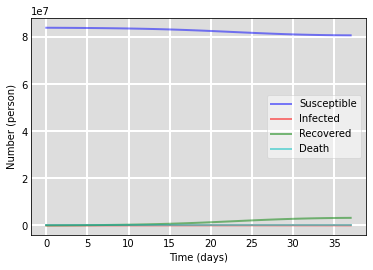

In [1516]:
    # Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(days, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(days, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(days, R, 'g', alpha=0.5, lw=2, label='Recovered')
ax.plot(days, D, 'c', alpha=0.5, lw=2, label='Death')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (person)')
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

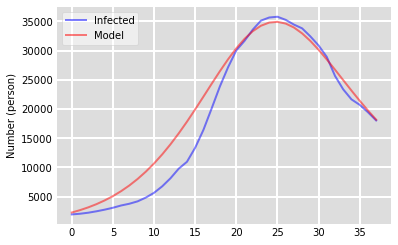

In [1517]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(days, xtc, 'b', alpha=0.5, lw=2, label='Infected')
ax.plot(days, I, 'r', alpha=0.5, lw=2, label='Model')
# ax.plot(days, y_hat1, 'g', alpha=0.5, lw=2, label='Model1')
ax.set_ylabel('Number (person)')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

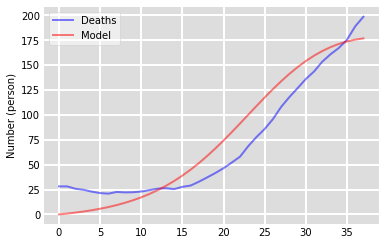

In [1518]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(days, xtd, 'b', alpha=0.5, lw=2, label='Deaths')
ax.plot(days, D, 'r', alpha=0.5, lw=2, label='Model')
# ax.plot(days, y_hat1, 'g', alpha=0.5, lw=2, label='Model1')
ax.set_ylabel('Number (person)')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

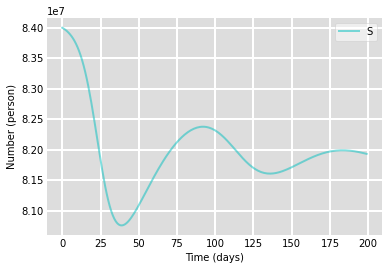

In [1519]:
t = np.linspace(0, 199, 200)
ret = odeint(derivs, y0, t, args=(N, obeta, ogamma, onu, odelta))
S, I, R, D = ret.T
plot(t, S, 'S', 'c')

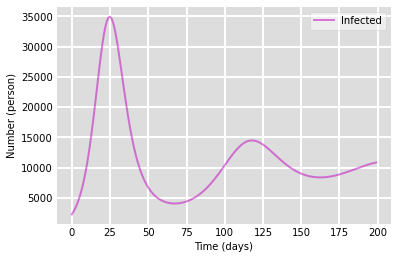

In [1520]:
plot(t, I, 'Infected', 'm')

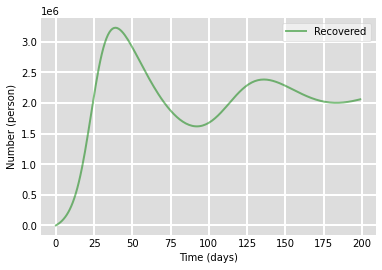

In [1521]:
plot(t, R, 'Recovered', 'g')

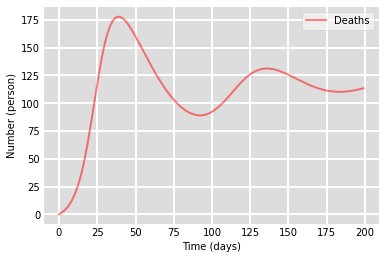

In [1522]:
plot(t, D, name='Deaths')

In [1523]:
print(ox)

[6.42087159e+00 6.25752593e+00 5.50410464e-05 3.00000000e-02
 1.02399780e+02]
